Workbench to create analyze.py
------------------------------

In [1]:
import os
import pandas as pd

from dstools import connect

In [2]:
os.listdir('..\data\Regression\Bike-Sharing-Dataset')

['day.csv', 'hour.csv', 'Readme.txt']

In [3]:
data_file = r'..\data\Regression\Bike-Sharing-Dataset\day.csv'

In [4]:
raw_data = connect.file_connect(data_file, 'CSV')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
raw_data.shape

(731, 16)

In [6]:
raw_data.values

array([[1, '2011-01-01', 1, ..., 331, 654, 985],
       [2, '2011-01-02', 1, ..., 131, 670, 801],
       [3, '2011-01-03', 1, ..., 120, 1229, 1349],
       ..., 
       [729, '2012-12-29', 1, ..., 159, 1182, 1341],
       [730, '2012-12-30', 1, ..., 364, 1432, 1796],
       [731, '2012-12-31', 1, ..., 439, 2290, 2729]], dtype=object)

In [7]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
raw_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

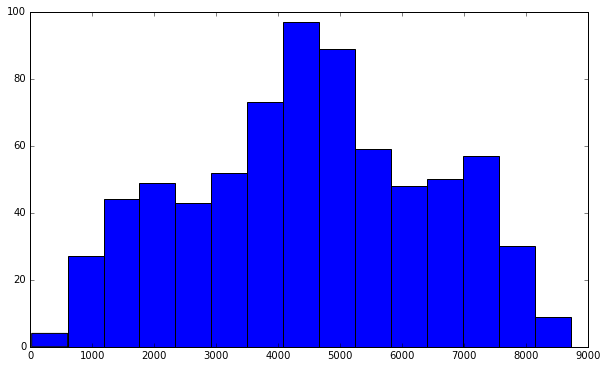

In [10]:
plt.figure(figsize= (10,6))
plt.hist(raw_data['cnt'], bins= 15)
plt.show()

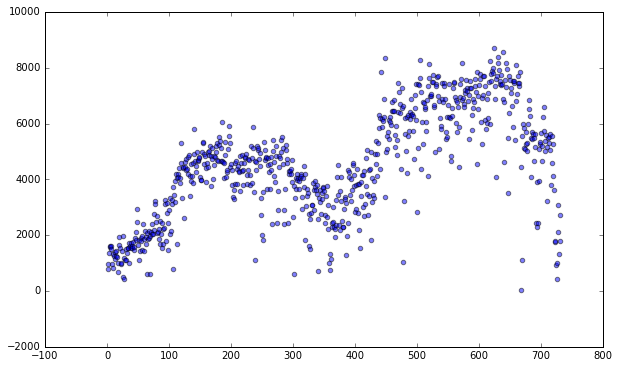

In [11]:
plt.figure(figsize= (10,6))
plt.scatter(x= raw_data[['instant']], y= raw_data[['cnt']], alpha= .5)
plt.show()

In [12]:
# Divide data into training and test sets
train_data, test_data = train_test_split(raw_data, test_size= 0.2, random_state= 0)  #random_state==seed

raw_data_X_train = train_data[['instant']]
raw_data_y_train = train_data['cnt']

raw_data_X_test = test_data[['instant']]
raw_data_y_test = test_data[['cnt']]

print('train:', len(train_data), 'test:', len(test_data))

train: 584 test: 147


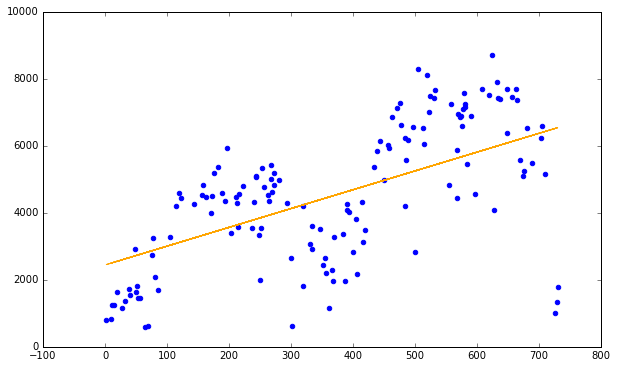

In [13]:
reg = linear_model.LinearRegression()
reg.fit(raw_data_X_train, raw_data_y_train)

plt.figure(figsize= (10,6))
plt.scatter(raw_data_X_test, raw_data_y_test, color= 'blue')
plt.plot(raw_data_X_test, reg.predict(raw_data_X_test), color= 'orange')
plt.show()

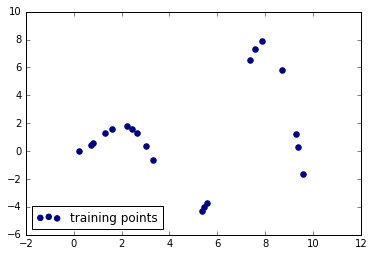

In [24]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
'''
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
'''
plt.legend(loc='lower left')

plt.show()

In [28]:
X

array([[ 0.2020202 ],
       [ 0.70707071],
       [ 0.80808081],
       [ 1.31313131],
       [ 1.61616162],
       [ 2.22222222],
       [ 2.42424242],
       [ 2.62626263],
       [ 3.03030303],
       [ 3.33333333],
       [ 5.35353535],
       [ 5.45454545],
       [ 5.55555556],
       [ 7.37373737],
       [ 7.57575758],
       [ 7.87878788],
       [ 8.68686869],
       [ 9.29292929],
       [ 9.39393939],
       [ 9.5959596 ]])

In [26]:
x_plot

(100,)

In [16]:
f(x_plot)

array([ 0.        ,  0.0101857 ,  0.04053512,  0.09042843,  0.15884308,
        0.24436952,  0.34523279,  0.45931986,  0.58421217,  0.71722315,
        0.85543996,  0.99576911,  1.13498512,  1.26978173,  1.39682482,
        1.5128064 ,  1.61449886,  1.69880869,  1.762829  ,  1.80389004,
        1.81960696,  1.80792419,  1.76715568,  1.69602053,  1.59367333,
        1.45972875,  1.29428011,  1.09791134,  0.87170227,  0.61722706,
        0.33654557,  0.03218784, -0.29286835, -0.63522654, -0.99110707,
       -1.35638856, -1.72665495, -2.09724759, -2.46332174, -2.81990682,
       -3.16196971, -3.48448034, -3.78247867, -4.0511423 , -4.28585385,
       -4.48226716, -4.63637149, -4.74455295, -4.80365209, -4.81101711,
       -4.76455181, -4.66275751, -4.50476846, -4.2903801 , -4.02006959,
       -3.69500842, -3.31706656, -2.88880819, -2.4134786 , -1.89498264,
       -1.33785439, -0.7472187 , -0.12874454,  0.51140918,  1.16665492,
        1.83004426,  2.49434154,  3.15210235,  3.79575636,  4.41

In [17]:
x

array([ 0.2020202 ,  0.70707071,  0.80808081,  1.31313131,  1.61616162,
        2.22222222,  2.42424242,  2.62626263,  3.03030303,  3.33333333,
        5.35353535,  5.45454545,  5.55555556,  7.37373737,  7.57575758,
        7.87878788,  8.68686869,  9.29292929,  9.39393939,  9.5959596 ])

In [18]:
y

array([ 0.04053512,  0.45931986,  0.58421217,  1.26978173,  1.61449886,
        1.76715568,  1.59367333,  1.29428011,  0.33654557, -0.63522654,
       -4.2903801 , -4.02006959, -3.69500842,  6.5396357 ,  7.28442965,
        7.8763639 ,  5.84402579,  1.22171343,  0.28964971, -1.63464132])

TypeError: unhashable type: 'slice'

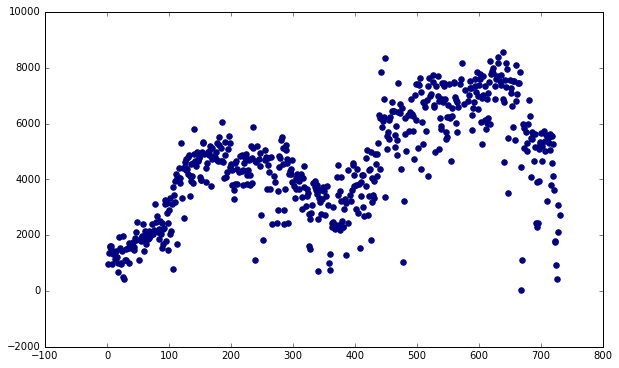

In [22]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

plt.figure(figsize= (10,6))
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(raw_data_X_train, raw_data_y_train, color='navy', s=30, marker='o', label="training points")

raw_data_X_test = raw_data_X_test[:, np.newaxis]

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    model.fit(raw_data_X_train, raw_data_y_train)
    y_plot = model.predict(raw_data_X_test)
    plt.plot(raw_data_X_test, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)



plt.legend(loc='lower left')
plt.show()

In [29]:
raw_data_X_test

,instant
196,197
187,188
14,15
31,32
390,391
319,320
299,300
702,703
462,463
27,28
